Some CUPS codes to simulate with:
- ES0021000009057014WW
- ES0339000004073003XQ0F
- ES0031102783040001BS0F
- ES0021000015466379WA
- ES0021000019341227KH
- Many: ES 0031 3000 2325 3001 BX, ES 0031 3000 2325 5047 PD, ES 0031 3000 2325 3034 NC, ES 0031 3000 2325 5003 YB, ES 0031 3000 2325 5001 YD, ES 0031 3000 2325 5029 FZ, ES 0031 3000 2325 3006 BS, ES 0031 3000 2325 3004 BJ, ES 0031 3000 2325 5005 YJ

- All CUPS at once: ES0021000009057014WW, ES0339000004073003XQ0F, ES0031102783040001BS0F, ES0021000015466379WA, ES0021000019341227KH, ES 0031 3000 2325 3001 BX, ES 0031 3000 2325 5047 PD, ES 0031 3000 2325 3034 NC, ES 0031 3000 2325 5003 YB, ES 0031 3000 2325 5001 YD, ES 0031 3000 2325 5029 FZ, ES 0031 3000 2325 3006 BS, ES 0031 3000 2325 3004 BJ, ES 0031 3000 2325 5005 YJ

In [91]:
import time
import requests
import pandas as pd

# Constants

WEBTOKEN = "SURHISHED9OHW27HLUHNLy(nfnl1i28swi9oFLIUEHW7HLggI347YRWUFLWUFWg"
POWER_PRICES = {
    '2.0TD': {
        'P1': 25.383055,
        'P2': 1.342713,
        'P3': 0.0,
        'P4': 0.0,
        'P5': 0.0,
        'P6': 0.0
    },
    '3.0TD': {
        'P1': 13.982509,
        'P2': 11.899074,
        'P3': 4.002045,
        'P4': 3.653973,
        'P5': 2.732707,
        'P6': 2.001136
    },
    '6.1TD': {
        'P1': 13.982509,
        'P2': 11.899074,
        'P3': 4.002045,
        'P4': 3.653973,
        'P5': 2.732707,
        'P6': 2.001136
    },
    '6.2TD': {
        'P1': 15.826387,
        'P2': 14.660345,
        'P3': 6.24435,
        'P4': 4.918409,
        'P5': 1.197731,
        'P6': 0.751653
    },
    '6.3TD': {
        'P1': 11.693507,
        'P2': 10.378653,
        'P3': 5.456201,
        'P4': 4.251289,
        'P5': 1.146336,
        'P6': 0.789272
    },
    '6.4TD': {
        'P1': 9.330085,
        'P2': 7.722984,
        'P3': 3.913267,
        'P4': 3.073874,
        'P5': 0.67228,
        'P6': 0.497567
    },
    '3.0TDVE': {
        'P1': 2.558984,
        'P2': 2.503926,
        'P3': 0.66441,
        'P4': 0.573622,
        'P5': 0.338303,
        'P6': 0.338303
    },
    '6.1TDVE': {
        'P1': 4.269983,
        'P2': 4.002324,
        'P3': 1.994267,
        'P4': 1.599721,
        'P5': 0.113126,
        'P6': 0.113126
    }
}
SEVILLA_HSP = 5.98 # Based on research
SYSTEM_EFFICIENCY = 0.75 # Based on research
YEARLY_FIXED_CHARGE_PEOPLE_FACTOR = (80.18 / 1.24 + 131.76 / 2.19 + 184.41 / 3.28) / 3 # Approximation from research
DAYS_IN_YEAR = 365.25
MONTHS_IN_YEAR = 12
DAYS_IN_MONTH = DAYS_IN_YEAR / MONTHS_IN_YEAR
YEARS_IN_CONTRACT = 25
PRICE_TIERS = [(10, 1600), (100, 1500), (1000, 1400), (float('inf'), 1300)]
PRICE_PER_KWH_SOLAR = 0
NEOS_VAT_PERCENT = 0.21
NEOS_PVOUT_IN_KWH_PER_KW = 2250 * 0.8 + 2100 * 0.2
AVERAGE_CONSUMPTION_PER_PERSON_PER_DAY = 3.25 # Based on research
PANELS_PER_KW = 1 / 0.44
INFLATION_PERCENT = 0.03 # Approximation from research
ROOFTOP_GRID_COVERAGE_PERCENT = 0.5 # Approximation from research
NEOS_GRID_COVERAGE_PERCENT = 0.34 # Sample result from quantitative research
GRID_RELATED_COSTS = 0.03 # Approximation from research
GRID_TAX_PERCENT = 0.1
ROOFTOP_PRICE = (1667 + 1942) / 2 # Based on research
ROOFTOP_MAINTENANCE_PER_MONTH = 3 # Based on research
ROOFTOP_VAT_PERCENT = 0.21
ROOFTOP_PVOUT_IN_KWH_PER_KW = 1510 # Based on research
SOLAR_PARK_PRODUCTIVITY_BOOST = NEOS_PVOUT_IN_KWH_PER_KW / ROOFTOP_PVOUT_IN_KWH_PER_KW
MAINTENANCE_FEE_PER_MONTH_PER_KW = 1.5
TOTAL_CONSUMPTION = 66567.0 # Sample result from quantitative research
TOTAL_SPENDING = 6326.16 # Sample result from quantitative research
WHOLESALE_COST_PER_KWH_CONSUMED = TOTAL_SPENDING / TOTAL_CONSUMPTION
SPENDING_PER_KWH_NON_SOLAR_CONSUMED = WHOLESALE_COST_PER_KWH_CONSUMED * (1 + GRID_TAX_PERCENT) + GRID_RELATED_COSTS
SPENDING_PER_KWH_SOLAR_CONSUMED = PRICE_PER_KWH_SOLAR * (1 + GRID_TAX_PERCENT) + GRID_RELATED_COSTS
TOTAL_REVENUE_EXCESS = 2296.62 # Sample result from quantitative research
REVENUE_PER_KWH_CONSUMED = (TOTAL_REVENUE_EXCESS / TOTAL_CONSUMPTION) * SOLAR_PARK_PRODUCTIVITY_BOOST
SAMPLE_CAPACITY = 30 # Sample result from quantitative research
TOTAL_REVENUE_100 = 5875.77 # Sample result from quantitative research
REVENUE_PER_KW_100 = TOTAL_REVENUE_100 / SAMPLE_CAPACITY * SOLAR_PARK_PRODUCTIVITY_BOOST
REVENUE_PER_KW_100_W_INFLATION = [REVENUE_PER_KW_100 * (1 + INFLATION_PERCENT) ** i for i in range(25)]
INCOME_TAX_PERCENT = 0.3 # Based on research
MALE_ADULT_ASIAN_ELEPHANT_WEIGHT_IN_TONS = 4 # Based on research
COMPETITOR_PARK_EMISSIONS_SAVED_PER_KWH = 2001 / 4100 # Based on research
SPAIN_GERMANY_PVOUT_BOOST = 4.41 / 2.96 # Based on research
KGS_PER_TON = 1000

# Helper functions

def calculate_total_price(capacity):
    total_price = 0
    for tier_capacity, tier_price in PRICE_TIERS:
        if capacity > tier_capacity:
            total_price += tier_capacity * tier_price
            capacity -= tier_capacity
        else:
            total_price += capacity * tier_price
            break
    return total_price

def get_consumption_data_from_api(cups_code):
    session = requests.Session()
    url = f"https://data.enerbit.es/api/sips/consumption_pse/?cups={cups_code}&replace=true"
    response = session.get(url, headers={"WEBTOKEN": WEBTOKEN})
    return response.json() if response.status_code == 200 else None

def get_technical_data_from_api(cups_code):
    session = requests.Session()
    url = f"https://data.enerbit.es/api/sips/pse/?cups={cups_code}&replace=true"
    response = session.get(url, headers={"WEBTOKEN": WEBTOKEN})
    return response.json() if response.status_code == 200 else None

def process_consumption_data(consumption_data):
    df = pd.DataFrame(consumption_data['summary']['cons_month'])
    df[['Year', 'Month']] = df['month_date'].str.extract(r'(\d{4})(\d{2})')
    df_data = pd.DataFrame(df.pop('data').tolist(), columns=[f'P{i}' for i in range(1, 7)])
    final_df = pd.concat([df[['Year', 'Month']], df_data], axis=1)
    final_df['Total'] = final_df.iloc[:, 2:].sum(axis=1)
    return final_df

def main():

    input_type = input("Enter 1 to input the number of people in the house or 2 to enter your CUPS code: ").replace(" ", "")

    start_time = time.time()

    if input_type == "1":

        number_of_people = int(input("Please enter the number of people in the house: "))
        start_time2 = time.time()
        mean_daily_average_consumption = number_of_people * AVERAGE_CONSUMPTION_PER_PERSON_PER_DAY
        yearly_consumption = mean_daily_average_consumption * DAYS_IN_YEAR
        required_capacity = (mean_daily_average_consumption / SEVILLA_HSP) / SYSTEM_EFFICIENCY
        vsi_required_capacity = required_capacity / SOLAR_PARK_PRODUCTIVITY_BOOST
        yearly_fixed_charge = required_capacity * YEARLY_FIXED_CHARGE_PEOPLE_FACTOR

        if vsi_required_capacity <= 15:
            SERVICE_FEE_PER_MONTH = 6
            UTILITY_PRICE = 0.191649
        else:
            SERVICE_FEE_PER_MONTH = 12
            UTILITY_PRICE = 0.165449

        yearly_variable_bill = UTILITY_PRICE * yearly_consumption

    elif input_type == "2":

        cups_input = input("Please enter the CUPS code(s). If many, separate them by commas: ").replace(" ", "")
        start_time2 = time.time()
        cups_codes = [cups.strip() for cups in cups_input.split(",")]

        if len(cups_codes) == 1:
            consumption_data = get_consumption_data_from_api(cups_codes[0])
            technical_data = get_technical_data_from_api(cups_codes[0])

            if consumption_data and technical_data:
                final_df = process_consumption_data(consumption_data)
                mean_daily_average_consumption = final_df['Total'].sum() / (final_df.shape[0] * DAYS_IN_MONTH)
                required_capacity = (mean_daily_average_consumption / SEVILLA_HSP) / SYSTEM_EFFICIENCY
                vsi_required_capacity = required_capacity / SOLAR_PARK_PRODUCTIVITY_BOOST
                yearly_consumption = (final_df['Total'].sum() / final_df.shape[0]) * MONTHS_IN_YEAR

                type_consumption_point = technical_data['tipoPerfilConsumo'][1:] if 'tipoPerfilConsumo' in technical_data else None
                type_consumption_point = type_consumption_point.upper()
                relevant_prices = POWER_PRICES[type_consumption_point]
                contracted_powers = {f'P{i}': float(technical_data.get(f'potenciasContratadasEnWP{i}') or 0) for i in range(1, 7)}
                final_charges = [price * contracted_powers[period] / 1000 for period, price in relevant_prices.items()]
                yearly_fixed_charge = sum(final_charges)

                if type_consumption_point == '2.0TD':
                    SERVICE_FEE_PER_MONTH = 6
                    UTILITY_PRICE = 0.191649
                elif type_consumption_point in ['3.0TD', '3.0TDVE']:
                    SERVICE_FEE_PER_MONTH = 12
                    UTILITY_PRICE = 0.165449
                else:
                    SERVICE_FEE_PER_MONTH = 100
                    UTILITY_PRICE = 0.137538 # Sample result from pooled CUPS case study

                yearly_variable_bill = UTILITY_PRICE * yearly_consumption

            else:
                print(f"Error fetching data for CUPS code: {cups_codes[0]}")
                return
        else:

            required_capacity = 0
            vsi_required_capacity = 0
            yearly_consumption = 0
            yearly_fixed_charge = 0
            yearly_variable_bill = 0

            for cups_code in cups_codes:
                consumption_data = get_consumption_data_from_api(cups_code)
                technical_data = get_technical_data_from_api(cups_code)

                if consumption_data and technical_data:
                    final_df = process_consumption_data(consumption_data)
                    mean_daily_average_consumption = final_df['Total'].sum() / (final_df.shape[0] * DAYS_IN_MONTH)
                    individual_required_capacity = (mean_daily_average_consumption / SEVILLA_HSP) / SYSTEM_EFFICIENCY
                    required_capacity += individual_required_capacity
                    vsi_individual_required_capacity = individual_required_capacity / SOLAR_PARK_PRODUCTIVITY_BOOST
                    vsi_required_capacity += vsi_individual_required_capacity

                    individual_yearly_consumption = (final_df['Total'].sum() / final_df.shape[0]) * MONTHS_IN_YEAR
                    yearly_consumption += individual_yearly_consumption

                    type_consumption_point = technical_data['tipoPerfilConsumo'][1:] if 'tipoPerfilConsumo' in technical_data else None
                    type_consumption_point = type_consumption_point.upper()
                    relevant_prices = POWER_PRICES[type_consumption_point]
                    contracted_powers = {f'P{i}': float(technical_data.get(f'potenciasContratadasEnWP{i}') or 0) for i in range(1, 7)}
                    final_charges = [price * contracted_powers[period] / 1000 for period, price in relevant_prices.items()]
                    individual_yearly_fixed_charge = sum(final_charges)
                    yearly_fixed_charge += individual_yearly_fixed_charge

                    if type_consumption_point == '2.0TD':
                        UTILITY_PRICE = 0.191649
                        industrial_customer = False
                    elif type_consumption_point in ['3.0TD', '3.0TDVE']:
                        UTILITY_PRICE = 0.165449
                        industrial_customer = False
                    else:
                        UTILITY_PRICE = 0.137538 # Sample result from pooled CUPS case study
                        industrial_customer = True

                    individual_yearly_variable_bill = UTILITY_PRICE * individual_yearly_consumption
                    yearly_variable_bill += individual_yearly_variable_bill

                else:
                    print(f"Error fetching data for CUPS code: {cups_code}")
                    return

            if industrial_customer:
                SERVICE_FEE_PER_MONTH = 100
            else:
                SERVICE_FEE_PER_MONTH = 12

        total_customer_fees = SERVICE_FEE_PER_MONTH * MONTHS_IN_YEAR * YEARS_IN_CONTRACT

    total_customer_fees = SERVICE_FEE_PER_MONTH * MONTHS_IN_YEAR * YEARS_IN_CONTRACT

    # Number of Panels & Virtual Solar Installation Price

    number_of_panels = vsi_required_capacity * PANELS_PER_KW
    total_price_before_tax = calculate_total_price(vsi_required_capacity)
    total_price_after_tax = total_price_before_tax * (1 + NEOS_VAT_PERCENT)
    neos_installation_tax = total_price_after_tax - total_price_before_tax

    # Fixed Charges

    yearly_fixed_charges_w_inflation = [yearly_fixed_charge * (1 + INFLATION_PERCENT) ** i for i in range(25)]
    total_fixed_charges = sum(yearly_fixed_charges_w_inflation)

    # Total Spending with Regular Provider

    yearly_variable_bills_w_inflation = [yearly_variable_bill * (1 + INFLATION_PERCENT) ** i for i in range(25)]
    total_variable_charges = sum(yearly_variable_bills_w_inflation)
    total_regular_bills_w_inflation = [fixed + variable for fixed, variable in zip(yearly_fixed_charges_w_inflation, yearly_variable_bills_w_inflation)]
    total_spending_w_regular_provider = sum(total_regular_bills_w_inflation)

    # Customer's Revenue with Neos

    customers_revenue = REVENUE_PER_KWH_CONSUMED * yearly_consumption
    customers_revenue_w_inflation = [customers_revenue * (1 + INFLATION_PERCENT) ** i for i in range(25)]
    total_customers_revenue = sum(customers_revenue_w_inflation)

    # Customer's Spending with Neos Outside of Solar Hours

    customers_spending_non_solar = NEOS_GRID_COVERAGE_PERCENT * SPENDING_PER_KWH_NON_SOLAR_CONSUMED * yearly_consumption
    customers_spending_non_solar_w_inflation = [customers_spending_non_solar * (1 + INFLATION_PERCENT) ** i for i in range(25)]
    total_customers_spending_non_solar = sum(customers_spending_non_solar_w_inflation)

    # Customer's Spending with Neos During Solar Hours

    customers_spending_solar = (1 - NEOS_GRID_COVERAGE_PERCENT) * SPENDING_PER_KWH_SOLAR_CONSUMED * yearly_consumption
    customers_spending_solar_w_inflation = [customers_spending_solar * (1 + INFLATION_PERCENT) ** i for i in range(25)]
    total_customers_spending_solar = sum(customers_spending_solar_w_inflation)

    # Total Spending with Neos as Provider

    total_spending_w_neos_provider = total_fixed_charges + total_price_after_tax + total_customer_fees + \
    total_customers_spending_non_solar + total_customers_spending_solar - total_customers_revenue

    # Total Spending without Neos as Provider

    total_customers_revenue_100 = vsi_required_capacity * sum(REVENUE_PER_KW_100_W_INFLATION)
    total_customers_profit_100 = total_customers_revenue_100 # * (1 - INCOME_TAX_PERCENT)

    total_customers_fees_100 = (vsi_required_capacity * MAINTENANCE_FEE_PER_MONTH_PER_KW) * \
    MONTHS_IN_YEAR * YEARS_IN_CONTRACT

    net_total_spending_without_neos_provider = total_fixed_charges + total_price_after_tax + total_customers_fees_100 + \
    total_variable_charges - total_customers_profit_100

    # Total Spending with Rooftop Panels & Regular Provider

    rooftop_installation_price_before_tax = required_capacity * ROOFTOP_PRICE
    rooftop_installation_price_after_tax = rooftop_installation_price_before_tax * (1 + ROOFTOP_VAT_PERCENT)
    rooftop_installation_tax = rooftop_installation_price_after_tax - rooftop_installation_price_before_tax
    total_spending_w_rooftop = total_fixed_charges + rooftop_installation_price_after_tax + required_capacity * \
    ROOFTOP_MAINTENANCE_PER_MONTH * MONTHS_IN_YEAR * YEARS_IN_CONTRACT + \
    ROOFTOP_GRID_COVERAGE_PERCENT * total_variable_charges

    # Printing Insights

    electricity_costs_w_neos = total_spending_w_neos_provider - total_price_after_tax
    savings_retail_w_neos = total_spending_w_regular_provider - electricity_costs_w_neos
    percent_savings_w_neos = 100 * savings_retail_w_neos / total_spending_w_regular_provider
    savings_with_installation_w_neos = total_spending_w_regular_provider - total_spending_w_neos_provider
    percent_savings_ultimate_w_neos = 100 * savings_with_installation_w_neos / total_spending_w_regular_provider

    electricity_costs_without_neos = net_total_spending_without_neos_provider - total_price_after_tax
    savings_retail_without_neos = total_spending_w_regular_provider - electricity_costs_without_neos
    percent_savings_without_neos = 100 * savings_retail_without_neos / total_spending_w_regular_provider
    savings_with_installation_without_neos = total_spending_w_regular_provider - net_total_spending_without_neos_provider
    percent_savings_ultimate_without_neos = 100 * savings_with_installation_without_neos / total_spending_w_regular_provider

    electricity_costs_rooftop = total_spending_w_rooftop - rooftop_installation_price_after_tax
    savings_retail_rooftop = total_spending_w_regular_provider - electricity_costs_rooftop
    percent_savings_retail_rooftop = 100 * savings_retail_rooftop / total_spending_w_regular_provider
    savings_with_installation_rooftop = total_spending_w_regular_provider - total_spending_w_rooftop
    percent_savings_ultimate_rooftop = 100 * savings_with_installation_rooftop / total_spending_w_regular_provider

    print(f"""
    Yearly Consumption: {yearly_consumption:.2f} kWh.
    Required Capacity: {vsi_required_capacity:.2f} kW.
    Number of Panels: {number_of_panels:.2f}.

    We estimate that:
    - With a regular provider:
    1. You'd spend €{total_spending_w_regular_provider:.2f} over 25 years.

    - With Neos virtual installations and Neos as a provider:
    1. You'd spend €{total_price_before_tax:.2f} on the installation, €{neos_installation_tax:.2f} on VAT, coming to a total of €{total_price_after_tax:.2f}.
    2. You'd spend €{electricity_costs_w_neos:.2f} over 25 years.
    3. Saving €{savings_retail_w_neos:.2f} ({percent_savings_w_neos:.2f}%) off your monthly electricity bills.
    4. Saving €{savings_with_installation_w_neos:.2f} ({percent_savings_ultimate_w_neos:.2f}%) if we include the installation cost.

    - With Neos virtual installations and a regular provider:
    1. You'd spend €{total_price_before_tax:.2f} on the installation, €{neos_installation_tax:.2f} on VAT, coming to a total of €{total_price_after_tax:.2f}.
    2. You'd spend €{electricity_costs_without_neos:.2f} over 25 years.
    3. Saving €{savings_retail_without_neos:.2f} ({percent_savings_without_neos:.2f}%) off your monthly electricity bills.
    4. Saving €{savings_with_installation_without_neos:.2f} ({percent_savings_ultimate_without_neos:.2f}%) if we include the installation cost.

    - With off-grid rooftop panels and a regular provider:
    1. You'd spend €{rooftop_installation_price_before_tax:.2f} on the installation, €{rooftop_installation_tax:.2f} on VAT, coming to a total of €{rooftop_installation_price_after_tax:.2f}.
    2. You'd spend €{electricity_costs_rooftop:.2f} over 25 years.
    3. Saving €{savings_retail_rooftop:.2f} ({percent_savings_retail_rooftop:.2f}%) off your monthly electricity bills.
    4. Saving €{savings_with_installation_rooftop:.2f} ({percent_savings_ultimate_rooftop:.2f}%) if we include the installation cost.\n""")

    # Yearly Savings with Neos as Provider

    print("Neos as Provider:")

    total_savings_w_neos = 0
    net_spendings_w_neos_provider = [(fixed_charge + spend_non_solar + spend_solar + \
                                      total_customer_fees / YEARS_IN_CONTRACT - revenue) \
                                     for fixed_charge, spend_non_solar, spend_solar, revenue \
                                     in zip(yearly_fixed_charges_w_inflation, customers_spending_non_solar_w_inflation, \
                                            customers_spending_solar_w_inflation, customers_revenue_w_inflation)]
    savings_w_neos = [(bill - net_spending) for bill, net_spending \
                      in zip(total_regular_bills_w_inflation, net_spendings_w_neos_provider)]
    percent_savings_year1_w_neos = 100 * savings_w_neos[0] / total_regular_bills_w_inflation[0]

    print(f"First-year savings: {percent_savings_year1_w_neos:.2f}%.")
    print("Your cumulative savings in:")
    for i, saving in zip (range(1, 26), savings_w_neos):
        total_savings_w_neos += saving
        print(f"- Year {i}: €{total_savings_w_neos:.2f}.")

    # Payback with Neos as Provider

    sum_w_neos = 0
    left = total_price_after_tax
    values = []
    payback_w_neos = None
    for year, saving in zip(range(25), savings_w_neos):
        yearly = total_regular_bills_w_inflation[year]
        sum_w_neos += yearly
        left -= saving
        values.append(left)
        if left <= 0:
            precision = -values[year - 1] / (values[year] - values[year - 1])
            payback_w_neos = round(year + precision, 2)
            break
    print(f"\nWith Neos virtual installations and Neos as a provider, your investment will have paid for itself in {payback_w_neos} years.")

    # CO2 Emissions Saved with Neos as Provider

    neos_emissions_saved_per_year_in_kgs = vsi_required_capacity * COMPETITOR_PARK_EMISSIONS_SAVED_PER_KWH * \
    SPAIN_GERMANY_PVOUT_BOOST * NEOS_PVOUT_IN_KWH_PER_KW
    neos_emissions_saved_per_year_in_tons = neos_emissions_saved_per_year_in_kgs / KGS_PER_TON
    neos_total_emissions_saved_in_tons = neos_emissions_saved_per_year_in_tons * YEARS_IN_CONTRACT
    neos_elephants_carbon_capture = neos_total_emissions_saved_in_tons / MALE_ADULT_ASIAN_ELEPHANT_WEIGHT_IN_TONS

    print(f"With Neos virtual solar installations and Neos as a provider, you will help the country save {neos_total_emissions_saved_in_tons:.2f} tons in CO2 emissions over the next 25 years.")
    print(f"This reduction in CO2 emissions is comparable to the collective weight of {neos_elephants_carbon_capture:.2f} adult male Asian elephants.\n")

    # Yearly Savings without Neos as Provider

    print("Neos & Regular Provider:")

    profits_without_neos_provider = []

    for revenue_per_kw in REVENUE_PER_KW_100_W_INFLATION:
        total_revenue = vsi_required_capacity * revenue_per_kw
        final_profit = total_revenue # * (1 - INCOME_TAX_PERCENT)
        profits_without_neos_provider.append(final_profit)

    total_savings_without_neos = 0
    net_spendings_without_neos_provider = [((vsi_required_capacity * MAINTENANCE_FEE_PER_MONTH_PER_KW) \
                                            * MONTHS_IN_YEAR + bill - profit) for bill, profit \
                                           in zip(total_regular_bills_w_inflation, profits_without_neos_provider)]
    savings_without_neos = [(bill - net_spending) for bill, net_spending \
                            in zip(total_regular_bills_w_inflation, net_spendings_without_neos_provider)]
    percent_savings_year1_without_neos = 100 * savings_without_neos[0] / total_regular_bills_w_inflation[0]

    print(f"First-year savings: {percent_savings_year1_without_neos:.2f}%.")
    print("Your cumulative savings in:")
    for i, saving in zip (range(1, 26), savings_without_neos):
        total_savings_without_neos += saving
        print(f"- Year {i}: €{total_savings_without_neos:.2f}.")

    # Payback without Neos as Provider

    sum_without_neos = 0
    left = total_price_after_tax
    values = []
    payback_without_neos = None
    for year, saving in zip(range(25), savings_without_neos):
        yearly = total_regular_bills_w_inflation[year]
        sum_without_neos += yearly
        left -= saving
        values.append(left)
        if left <= 0:
            precision = -values[year - 1] / (values[year] - values[year - 1])
            payback_without_neos = round(year + precision, 2)
            break
    print(f"\nWith Neos virtual installations and a regular provider, your investment will have paid for itself in {payback_without_neos} years.")

    # CO2 Emissions Saved without Neos as Provider

    neos_not_provider_elephants_carbon_capture = neos_elephants_carbon_capture
    neos_not_provider_emissions_saved_per_year_in_tons = neos_emissions_saved_per_year_in_tons
    neos_not_provider_total_emissions_saved_in_tons = neos_total_emissions_saved_in_tons
    neos_not_provider_elephants_carbon_capture = neos_elephants_carbon_capture

    print(f"With Neos virtual solar installations and a regular provider, you will help the country save {neos_not_provider_total_emissions_saved_in_tons:.2f} tons in CO2 emissions over the next 25 years.")
    print(f"This reduction in CO2 emissions is comparable to the collective weight of {neos_not_provider_elephants_carbon_capture:.2f} adult male Asian elephants.\n")

    # Yearly Savings with Rooftop Panels

    print("Rooftop Panels:")
    total_savings_rooftop = 0
    net_rooftop_spendings = [(required_capacity * ROOFTOP_MAINTENANCE_PER_MONTH * MONTHS_IN_YEAR \
                              + ROOFTOP_GRID_COVERAGE_PERCENT * bill + fixed_charge) \
                             for bill, fixed_charge in zip(yearly_variable_bills_w_inflation, yearly_fixed_charges_w_inflation)]
    rooftop_savings = [(bill - net_rooftop_spending) for bill, net_rooftop_spending in zip(total_regular_bills_w_inflation, net_rooftop_spendings)]
    percent_savings_year1_rooftop = 100 * rooftop_savings[0] / total_regular_bills_w_inflation[0]

    print(f"First-year savings: {percent_savings_year1_rooftop:.2f}%.")
    print("Your cumulative savings in:")
    for i, saving in zip (range(1, 26), rooftop_savings):
        total_savings_rooftop += saving
        print(f"- Year {i}: €{total_savings_rooftop:.2f}.")

    # Payback with Rooftop Panels

    rooftop_sum = 0
    left = rooftop_installation_price_after_tax
    values = []
    payback_rooftop = None
    for year, rooftop_saving in zip(range(25), rooftop_savings):
        yearly = total_regular_bills_w_inflation[year]
        rooftop_sum += yearly
        left -= rooftop_saving
        values.append(left)
        if left <= 0:
            precision = -values[year - 1] / (values[year] - values[year - 1])
            payback_rooftop = round(year + precision, 2)
            break
    print(f"\nWith rooftop panels and a regular provider, your investment will have paid for itself in {payback_rooftop} years.")

    # CO2 Emissions Saved with Rooftop Panels

    rooftop_emissions_saved_per_year_in_kgs = neos_emissions_saved_per_year_in_kgs / SOLAR_PARK_PRODUCTIVITY_BOOST
    rooftop_emissions_saved_per_year_in_tons = rooftop_emissions_saved_per_year_in_kgs / KGS_PER_TON
    rooftop_total_emissions_saved_in_tons = rooftop_emissions_saved_per_year_in_tons * YEARS_IN_CONTRACT
    rooftop_elephants_carbon_capture = rooftop_total_emissions_saved_in_tons / MALE_ADULT_ASIAN_ELEPHANT_WEIGHT_IN_TONS

    print(f"With rooftop panels and a regular provider, you will help the country save {rooftop_total_emissions_saved_in_tons:.2f} tons in CO2 emissions over the next 25 years.")
    print(f"This reduction in CO2 emissions is comparable to the collective weight of {rooftop_elephants_carbon_capture:.2f} adult male Asian elephants.\n")

    # End Timing

    end_time = time.time()
    print(f"Execution time: {end_time - start_time2:.2f} seconds.")
    print(f"Execution time: {end_time - start_time:.2f} seconds.")

    global_capacity = 0

    def update_capacity(new_capacity):
       global global_capacity  # Declare the use of the global variable within this function
       global_capacity = new_capacity  # Modify the global variable

    # Example of updating global_capacity
    update_capacity(required_capacity)

    global_panels = 0

    def update_panels(new_panels):
       global global_panels  # Declare the use of the global variable within this function
       global_panels = new_panels  # Modify the global variable

    # Example of updating global_capacity
    update_panels(number_of_panels)

    global_percentage = 0

    def update_percentage(new_percentage):
       global global_percentage  # Declare the use of the global variable within this function
       global_percentage = new_percentage  # Modify the global variable

    # Example of updating global_capacity
    update_percentage(percent_savings_year1_w_neos)

    global_price = 0

    def update_price(new_price):
       global global_price  # Declare the use of the global variable within this function
       global_price = new_price  # Modify the global variable

    # Example of updating global_capacity
    update_price(total_price_before_tax)

    global_savings = 0

    def update_savings(new_savings):
       global global_savings  # Declare the use of the global variable within this function
       global_savings = new_savings  # Modify the global variable

    # Example of updating global_capacity
    update_savings(total_savings_w_neos)

    global_payback_neos = 0

    def update_payback_neos(new_payback):
       global global_payback_neos  # Declare the use of the global variable within this function
       global_payback_neos = new_payback  # Modify the global variable

    # Example of updating global_capacity
    update_payback_neos(payback_w_neos)

    global_payback_rooftop = 0

    def update_payback_rooftop(new_payback):
       global global_payback_rooftop  # Declare the use of the global variable within this function
       global_payback_rooftop = new_payback  # Modify the global variable

    # Example of updating global_capacity
    update_payback_rooftop(payback_rooftop)

    global_tons = 0

    def update_tons(new_tons):
       global global_tons  # Declare the use of the global variable within this function
       global_tons = new_tons  # Modify the global variable

    # Example of updating global_capacity
    update_tons(neos_total_emissions_saved_in_tons)  

    global_payback_df = 0

    def update_payback_df(payback_df):
       global global_payback_df  # Declare the use of the global variable within this function
       global_payback_df = payback_df  # Modify the global variable

    # Example of updating global_capacity
    update_payback_df(df_pdf_payback)   

if __name__ == "__main__":
    main()


    Required Capacity: 1.45 kW.
    Number of Panels: 3.18.

    We estimate that:
    - With a regular provider:
    1. You'd spend €22901.01 over 25 years.

    - With Neos virtual installations and Neos as a provider:
    1. You'd spend €2318.84 on the installation, €231.88 on VAT, coming to a total of €2550.72.
    2. You'd spend €8337.80 over 25 years.
    3. Saving €14563.22 (63.59%) off your monthly electricity bills.
    4. Saving €12012.49 (52.45%) if we include the installation cost.

    - With Neos virtual installations and a regular provider:
    1. You'd spend €2318.84 on the installation, €231.88 on VAT, coming to a total of €2550.72.
    2. You'd spend €11803.82 over 25 years.
    3. Saving €11097.20 (48.46%) off your monthly electricity bills.
    4. Saving €8546.47 (37.32%) if we include the installation cost.

    - With off-grid rooftop panels and a regular provider:
    1. You'd spend €2615.22 on the installation, €549.20 on VAT, coming to a total of €3164.41.
   

In [92]:
from reportlab.pdfgen import canvas
from reportlab.lib.units import mm
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.styles import ParagraphStyle
from reportlab.platypus import Paragraph
from reportlab.lib.enums import TA_JUSTIFY

# Register the Codec-Pro font
pdfmetrics.registerFont(TTFont('CodecPro', 'codec-pro.regular.ttf'))
pdfmetrics.registerFont(TTFont('CodecPro-Bold', 'codec-pro-bold.ttf'))

# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 5.png'
output_pdf_path = 'Page 5.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Draw the background image to cover the entire page with scaling
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height, mask='auto')

paragraph_text = f"<font face='CodecPro'>En base a este estudio, se aconseja al cliente una Instalación Solar Virtual de </font><font face='CodecPro-Bold'>{global_capacity:.1f} kWp</font><font face='CodecPro'>, equivalente a </font><font face='CodecPro-Bold'>{global_panels:.1f} paneles</font><font face='CodecPro'>. Dicha Instalación Solar Virtual producirá</font><font face='CodecPro-Bold'> {global_capacity*2250:.1f} kWh</font><font face='CodecPro'> de electricidad al año, el equivalente a un </font><font face='CodecPro-Bold'>{global_percentage:.1f}%</font><font face='CodecPro'> del consumo total.</font>"

# Create a paragraph style
paragraph_style = ParagraphStyle('Custom', fontName='CodecPro', fontSize=11, leading=14, alignment=TA_JUSTIFY)

# Create a Paragraph object with the formatted text and style
paragraph = Paragraph(paragraph_text, paragraph_style)

# Draw the paragraph on the PDF
paragraph.wrapOn(c, 480, 500)  # Adjust the width and height as needed
paragraph.drawOn(c, 58, 480)  # Adjust the position as needed

# Calculate the position for the text box TOTAL PRODUCTION
x_position = page_width - 485 * scale_x
y_position = page_height - 560 * scale_y

# Add the placeholder text at the specified position
c.setFont("CodecPro-Bold", 25 * scale_y)
c.drawString(x_position, y_position, f"{global_capacity*2250:.1f} KWh")

# Calculate the position for the text box CAPACITY AND PANELS
x_position = 310 * scale_x
y_position = page_height - 560 * scale_y

# Add the placeholder text at the specified position
c.setFont("CodecPro-Bold", 25 * scale_y)
c.drawString(x_position, y_position, f"{global_capacity:.1f} KWp ({global_panels:.1f} Paneles)")

# Save the PDF
c.save()

In [93]:
#DATA FOR PLOTS

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('chart_data.csv')

# PVOUT
pvout = 2250

# Create Production Column
df['production'] = df['sum_of_percentages'] * pvout
df['production'] = df['production'].round(1).astype(float)

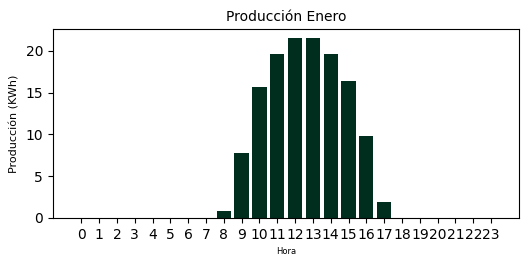

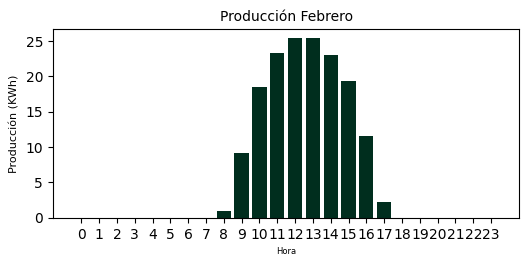

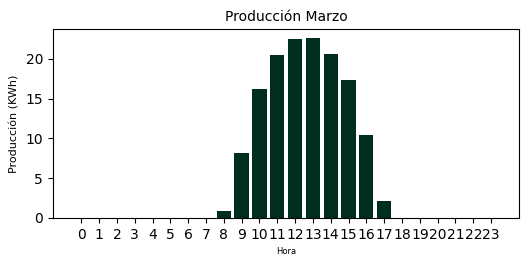

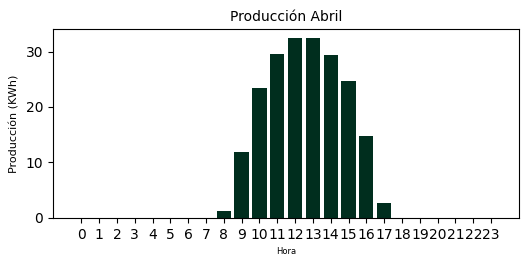

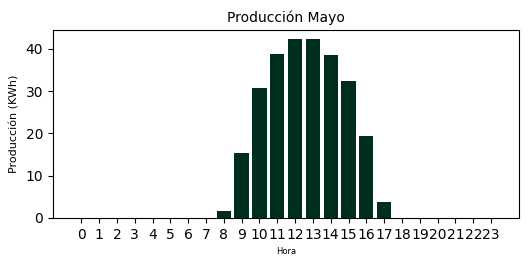

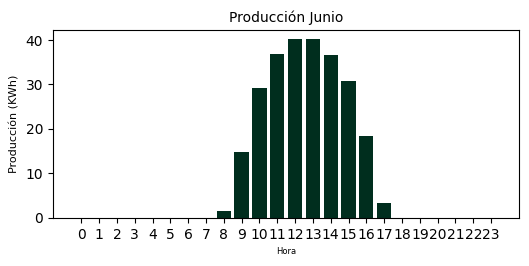

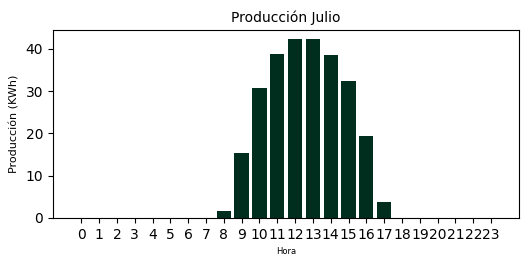

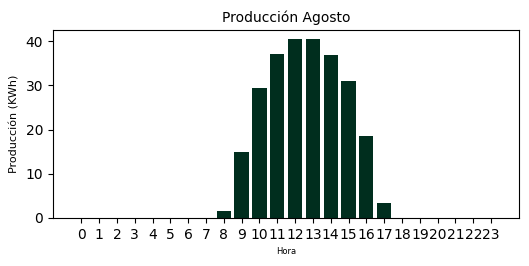

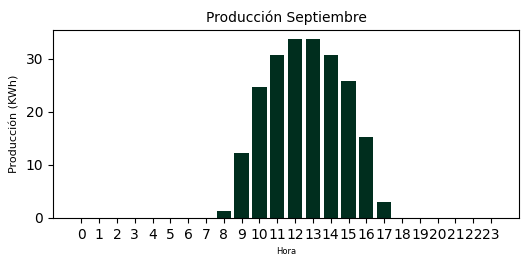

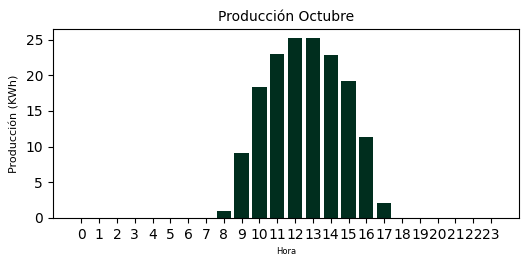

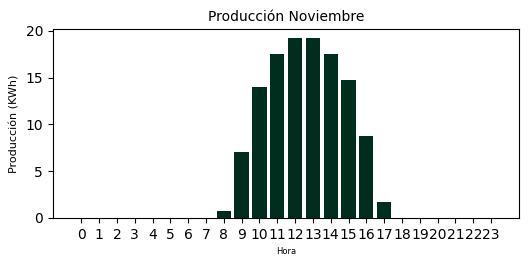

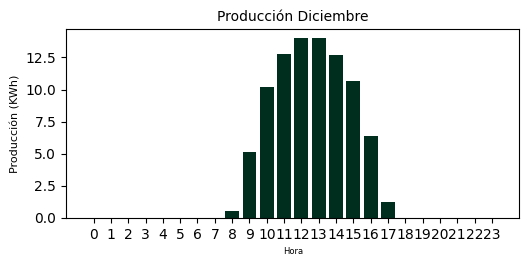

In [94]:
import matplotlib.pyplot as plt

# PLOT SIZES

# Set the plot size in pixels
plot_width_px = 383 
plot_height_px = 196

# Convert pixel dimensions to inches (assuming a default dpi of 100)
dpi = 71
plot_width_inches = plot_width_px / dpi
plot_height_inches = plot_height_px / dpi

# JANUARY GRAPH
# Keep only January Data Points
data_january = df[df['month'] == 1][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Enero', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'january.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# FEBRUARY GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 2][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Febrero', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'february.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# MARCH GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 3][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Marzo', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'march.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# APRIL GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 4][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Abril', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'april.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# MAY GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 5][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Mayo', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'may.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# JUNE GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 6][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Junio', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'june.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# JULY GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 7][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Julio', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'july.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# AUGUST GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 8][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Agosto', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'august.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# SEPTEMBER GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 9][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Septiembre', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'september.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# OCTOBER GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 10][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Octubre', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'october.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# NOVEMBER GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 11][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Noviembre', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'november.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')


# DECEMBER GRAPH
# Keep only February Data Points
data_january = df[df['month'] == 12][['hour', 'production']]

# Create a bar chart
plt.figure(figsize=(plot_width_inches, plot_height_inches))
plt.bar(data_january['hour'], data_january['production'], color='#002e1e')

# Set the labels and title
plt.xlabel('Hora', fontsize=6)
plt.ylabel('Producción (KWh)', fontsize=8)
plt.title('Producción Diciembre', fontsize=10)

# Set the tick positions and labels for every hour
hours = range(0, 24)
plt.xticks(hours, hours)

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'december.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')



In [95]:
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader

# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 6.png'
output_pdf_path = 'Page 6.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Create a canvas with the size matching your image
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Draw the background image to cover the entire page
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height)

# JANUARY
graph_image_path = 'january.png'  # Replace with the path to your graph image
graph_width = 383 # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 500  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# FEBRUARY
graph_image_path = 'february.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 300  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# MARCH
graph_image_path = 'march.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 100  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# Save and close the PDF
c.showPage()
c.save()

In [96]:
# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 7.png'
output_pdf_path = 'Page 7.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Create a canvas with the size matching your image
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Draw the background image to cover the entire page
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height)

# APRIL
graph_image_path = 'april.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 500  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# MAY
graph_image_path = 'may.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 300  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# JUNE
graph_image_path = 'june.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 100  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# Save and close the PDF
c.showPage()
c.save()

In [97]:
# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 8.png'
output_pdf_path = 'Page 8.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Create a canvas with the size matching your image
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Draw the background image to cover the entire page
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height)

# JULY
graph_image_path = 'july.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 500  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# AUGUST
graph_image_path = 'august.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 300  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# SEPTEMBER
graph_image_path = 'september.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 100  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# Save and close the PDF
c.showPage()
c.save()

In [98]:
# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 9.png'
output_pdf_path = 'Page 9.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Create a canvas with the size matching your image
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Draw the background image to cover the entire page
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height)

# OCTOBER
graph_image_path = 'october.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 500  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# FEBRUARY
graph_image_path = 'november.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 300  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# MARCH
graph_image_path = 'december.png'  # Replace with the path to your graph image
graph_width = 383  # Width of the graph in pixels
graph_height = 196  # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 50  # X-coordinate of the top-left corner of the graph
graph_y = 100  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# Save and close the PDF
c.showPage()
c.save()

pdf_paths = ['Pages 1-4.pdf', 'Page 5.pdf', 'Page 6.pdf', 'Page 7.pdf', 'Page 8.pdf', 'Page 9.pdf']


In [99]:
# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 10.png'
output_pdf_path = 'Page 10.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Draw the background image to cover the entire page with scaling
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height, mask='auto')

################## PARAGRAPH 1 (OFFER OVERVIEW)
paragraph_text = f"<font face='CodecPro'>El precio de la Instalación Solar Virtual propuesta de </font><font face='CodecPro-Bold'>{global_capacity:.1f} KWp </font><font face='CodecPro'>es de </font><font face='CodecPro-Bold'>{global_price:.2f} €</font><font face='CodecPro'>. Esto equivale a un precio de </font><font face='CodecPro-Bold'>{global_price/global_capacity:.2f}€/KWp</font>"

# Create a paragraph style
paragraph_style = ParagraphStyle('Custom', fontName='CodecPro', fontSize=11, leading=14, alignment=TA_JUSTIFY)

# Create a Paragraph object with the formatted text and style
paragraph = Paragraph(paragraph_text, paragraph_style)

# Draw the paragraph on the PDF
paragraph.wrapOn(c, 230, 500)  # Adjust the width and height as needed
paragraph.drawOn(c, 60, 600)  # Adjust the position as needed

################## PARAGRAPH 2 (TOTAL SAVINGS)
paragraph_text = f"<font face='CodecPro'>Asumiendo una inflación del 3.5% anual en el precio de la energía, el ahorro total obtenido por la Instalación Solar Virtual será de </font><font face='CodecPro-Bold'>{global_savings:.2f} €</font><font face='CodecPro'>. Esto supondrá un ahorro total </font><font face='CodecPro-Bold'>{global_savings/global_price:.1f} </font><font face='CodecPro'>veces mayor a la inversión inicial.</font>"

# Create a paragraph style
paragraph_style = ParagraphStyle('Custom', fontName='CodecPro', fontSize=11, leading=14, alignment=TA_JUSTIFY)

# Create a Paragraph object with the formatted text and style
paragraph = Paragraph(paragraph_text, paragraph_style)

# Draw the paragraph on the PDF
paragraph.wrapOn(c, 480, 500)  # Adjust the width and height as needed
paragraph.drawOn(c, 58, 218)  # Adjust the position as needed

################## PARAGRAPH 3 (PAYBACK)
paragraph_text = f"<font face='CodecPro'>Gracias a la superioridad productiva de nuestros parques solares, y al menor tamaño de la inversión inicial, la Instalación Solar Virtual se amortizará en </font><font face='CodecPro-Bold'>{global_payback_neos:.1f} años</font><font face='CodecPro'>.  Con su curva de consumo, el periodo medio de amortización de autoconsumo tradicional sería de </font><font face='CodecPro-Bold'>{global_payback_rooftop:.1f} años</font><font face='CodecPro'>.</font>"

# Create a paragraph style
paragraph_style = ParagraphStyle('Custom', fontName='CodecPro', fontSize=11, leading=14, alignment=TA_JUSTIFY)

# Create a Paragraph object with the formatted text and style
paragraph = Paragraph(paragraph_text, paragraph_style)

# Draw the paragraph on the PDF
paragraph.wrapOn(c, 480, 500)  # Adjust the width and height as needed
paragraph.drawOn(c, 58, 142)  # Adjust the position as needed

################## PARAGRAPH 4 (EMISSIONS)
paragraph_text = f"<font face='CodecPro'>Evitará </font><font face='CodecPro-Bold'>{global_tons:.2f} toneladas de CO2 </font><font face='CodecPro'>gracias a la producción de energía renovable y sostenible.</font>"

# Create a paragraph style
paragraph_style = ParagraphStyle('Custom', fontName='CodecPro', fontSize=11, leading=14, alignment=TA_JUSTIFY)

# Create a Paragraph object with the formatted text and style
paragraph = Paragraph(paragraph_text, paragraph_style)

# Draw the paragraph on the PDF
paragraph.wrapOn(c, 480, 500)  # Adjust the width and height as needed
paragraph.drawOn(c, 58, 88)  # Adjust the position as needed

# Save the PDF
c.save()

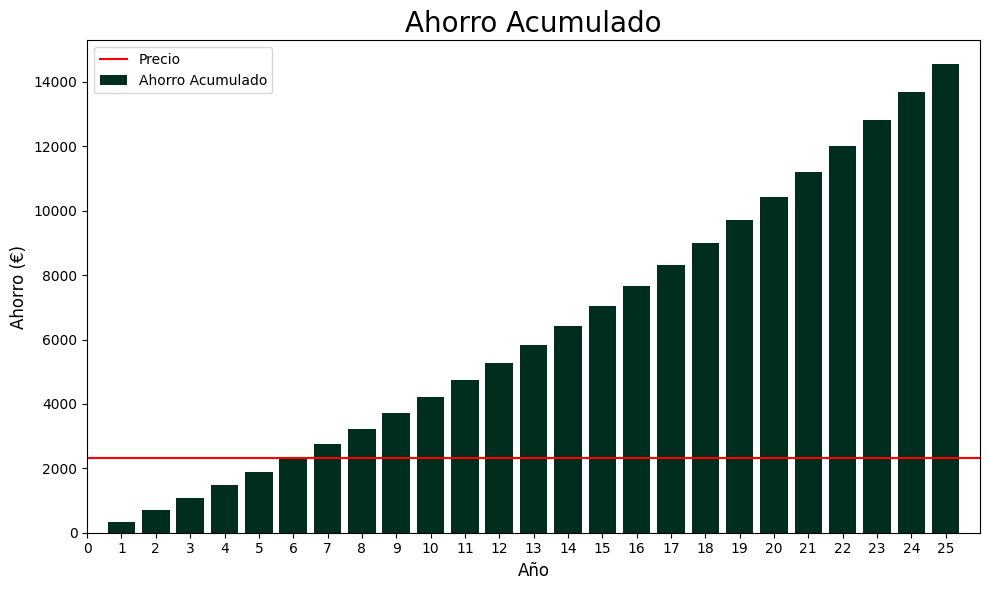

In [100]:
global_payback_df['cumulative_savings'] = global_payback_df['savings'].cumsum()

# Create the chart
plt.figure(figsize=(10, 6))

# Plotting cumulative savings
plt.bar(global_payback_df['year']+1, global_payback_df['cumulative_savings'], color='#002e1e', label='Ahorro Acumulado')

# Plotting the global price line
plt.axhline(y=global_price, color='red', linestyle='-', label='Precio')

# Set the chart title and labels
plt.title('Ahorro Acumulado', fontsize = 20)
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Ahorro (€)', fontsize = 12)

# Set the x-axis range from 1 to 25
plt.xlim(0, 26)

# Set the tick positions and labels for every year
years = range(0,26)
plt.xticks(years)  # Adjusted to directly use 'years'

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()

# Save the plot as a high-quality image
output_file = 'payback.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


In [101]:
# Replace 'path/to/your/background.jpg' with the path to your background image
background_image_path = 'Background Page 11.png'
output_pdf_path = 'Page 11.pdf'

# Set the page size to A4 (210mm x 297mm)
page_width = 210 * mm
page_height = 297 * mm

# Create a canvas with the A4 page size
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Calculate the scaling factors to fit the background image to the A4 size
image_width = 1414
image_height = 2000
scale_x = page_width / image_width
scale_y = page_height / image_height

# Create a canvas with the size matching your image
c = canvas.Canvas(output_pdf_path, pagesize=(page_width, page_height))

# Draw the background image to cover the entire page
c.drawImage(background_image_path, 0, 0, width=page_width, height=page_height)

# OCTOBER
graph_image_path = 'payback.png'  # Replace with the path to your graph image
graph_width = 383 * 1.35  # Width of the graph in pixels
graph_height = 196 * 1.35 # Height of the graph in pixels

# Calculate the position to place the graph (adjust as needed)
graph_x = 25  # X-coordinate of the top-left corner of the graph
graph_y = 430  # Y-coordinate of the top-left corner of the graph

# Load the graph image using ImageReader
graph_image = ImageReader(graph_image_path)

# Draw the graph image on the canvas
c.drawImage(graph_image, graph_x, graph_y, width=graph_width, height=graph_height)

# Save and close the PDF
c.showPage()
c.save()

In [102]:
from pypdf import PdfWriter

pdfs = ['Pages 1-4.pdf', 'Page 5.pdf', 'Page 6.pdf', 'Page 7.pdf', 'Page 8.pdf', 'Page 9.pdf','Page 10.pdf', 'Page 11.pdf', 'Page 12.pdf']

merger = PdfWriter()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()